In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv("HW3Data.csv",header=None,delimiter=",")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


## Inputting the Genes.txt as the headers for the data, needing to append the "Labels" on the 0 column as the Genes file does not take into account that column.

In [2]:
genes=open('Genes.txt','r').read()
geneheader=np.genfromtxt('Genes.txt',delimiter="\n",dtype=str)
df.columns=np.append("Labels",geneheader)
df.head()

,Labels,Hsa.3004 H55933 3' UTR 1 203417 H.sapiens mRNA for homologue to yeast ribosomal protein L41.,Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.37254 R85482 3' UTR 2a 180093 SERUM RESPONSE FACTOR (Homo sapiens),"Hsa.541 U14973 gene 1 ""Human ribosomal protein S29 mRNA, complete cds. """,Hsa.20836 R02593 3' UTR 2a 124094 60S ACIDIC RIBOSOMAL PROTEIN P1 (Polyorchis penicillatus),Hsa.1977 T51496 3' UTR 1 71488 60S RIBOSOMAL PROTEIN L37A (HUMAN).,Hsa.44472 H80240 3' UTR 2a 240814 INTER-ALPHA-TRYPSIN INHIBITOR COMPLEX COMPONENT II PRECURSOR (Homo sapiens),Hsa.3087 T65938 3' UTR 1 81639 TRANSLATIONALLY CONTROLLED TUMOR PROTEIN (HUMAN);.,...,Hsa.2618 X67699 gene 1 H.sapiens HE5 mRNA for CDw52 antigen.,Hsa.27285 R70790 3' UTR 2a 142585 GTP:AMP PHOSPHOTRANSFERASE MITOCHONDRIAL (Rattus norvegicus),"Hsa.41260 L11706 gene 1 ""Human hormone-sensitive lipase (LIPE) gene, complete cds. """,Hsa.14822 T90549 3' UTR 2a 110713 P-SELECTIN PRECURSOR (Homo sapiens),Hsa.336 D17390 gene 1 Human mRNA for MDC protein.,"Hsa.984 M33210 gene 1 ""Human colony stimulating factor 1 receptor (CSF1R) gene, exon 5. """,Hsa.35124 H18490 3' UTR 2a 171840 RAN GTPASE ACTIVATING PROTEIN 1 (Mus musculus),Hsa.3952 H40891 3' UTR 2a 175983 NODULATION PROTEIN Q (Azospirillum brasilense),Hsa.32734 R77780 3' UTR 2a 145300 TRANSPOSABLE ELEMENT ACTIVATOR (Zea mays),Hsa.9683 T49647 3' UTR 2a 67762 MYRISTOYLATED ALANINE-RICH C-KINASE SUBSTRATE (Homo sapiens)
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


## Checking for missing values

In [3]:
df.isnull().sum()

Labels                                                                                                                                                                                                                                                                                  0
Hsa.3004\tH55933\t3' UTR\t1\t203417\tH.sapiens mRNA for homologue to yeast ribosomal protein L41.                                                                                                                                                                                       0
Hsa.13491\tR39465\t3' UTR\t2a\t23933\tEUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus)                                                                                                                                                                                           0
Hsa.13491\tR39465\t3' UTR\t2a\t23933\tEUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus)                                                             

## Placing the data into x and y values, splitting the test and training data using random state=1

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
label = LabelEncoder()
y = label.fit_transform(y)
label.classes_

array([0, 1], dtype=int64)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y,random_state=1)
print("X_train shape: ", x_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", x_test.shape)
print("Y_test shape: ", y_test.shape)

('X_train shape: ', (49L, 2000L))
('Y_train shape: ', (49L,))
('X_test shape: ', (13L, 2000L))
('Y_test shape: ', (13L,))


## Using StandardScaler to scale the training and test data of the x value. Performing the RFE method with cross validation and plotting the performance vs. the number of features selected

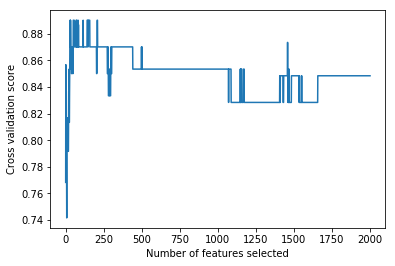

In [10]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV


scaler=StandardScaler().fit(x_train)
x_trainNew=scaler.transform(x_train)
x_testNew=scaler.transform(x_test)

svc = SVC(kernel="linear")

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),scoring='accuracy')
rfecv.fit(x_trainNew, y_train)


plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Showing the optimal number of features provided by the RFECV. Scoring the performance

In [7]:
print("Optimal number of features : %d" % rfecv.n_features_)
print("Test set score : %.5f" % rfecv.fit(x_trainNew, y_train).score(x_testNew,y_test))

Optimal number of features : 210
Test set score : 0.84615


## Listing where the selected features are located and what feature the location corresponds with.

In [8]:
SelectedFeatureLocation=np.where(rfecv.support_==True)
SelectedFeatureName=df.columns[SelectedFeatureLocation]

print("Locations of selected features : %s" % SelectedFeatureLocation)
print("Names of selected features : \n%s" % SelectedFeatureName)

Locations of selected features : [  10   13   33   98  123  134  140  141  152  163  172  174  210  211
  212  227  228  236  247  248  285  303  333  352  359  376  379  398
  404  424  452  460  492  503  512  515  552  560  563  572  575  577
  579  580  610  614  616  625  631  638  651  653  664  681  683  707
  720  731  733  738  751  757  763  764  768  787  791  794  798  806
  811  822  841  843  865  875  878  881  888  889  891  924  935  965
  973  979  985  990 1005 1017 1029 1047 1056 1059 1070 1072 1080 1092
 1093 1122 1141 1153 1167 1207 1209 1220 1230 1232 1255 1284 1287 1290
 1310 1312 1347 1359 1365 1366 1378 1397 1399 1404 1408 1416 1418 1422
 1458 1464 1472 1479 1487 1492 1493 1498 1499 1502 1504 1545 1547 1548
 1549 1554 1561 1569 1578 1581 1583 1595 1604 1605 1608 1610 1622 1624
 1634 1636 1640 1643 1648 1658 1667 1679 1684 1725 1731 1739 1764 1766
 1768 1771 1779 1783 1795 1796 1817 1826 1833 1835 1842 1858 1870 1872
 1873 1883 1885 1891 1892 1893 1894 1896 191

## Performing the holdout method for testing only with the selected features, confirming that the performance score is the same as the previous one.

In [9]:
svc.fit(x_trainNew[:,rfecv.support_],y_train)

holdoutPerformance=svc.score(x_testNew[:,rfecv.support_],y_test)
print("Performance of holdout with selected features : %.5f" % holdoutPerformance)

Performance of holdout with selected features : 0.84615
